In [1]:
#import necessary Libraries...

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning) 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
roc_curve, auc, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
crimes  = pd.read_csv('crimes_With_dummies.csv')

In [3]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(50, 20))
    #Generate Color Map, red & blue
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

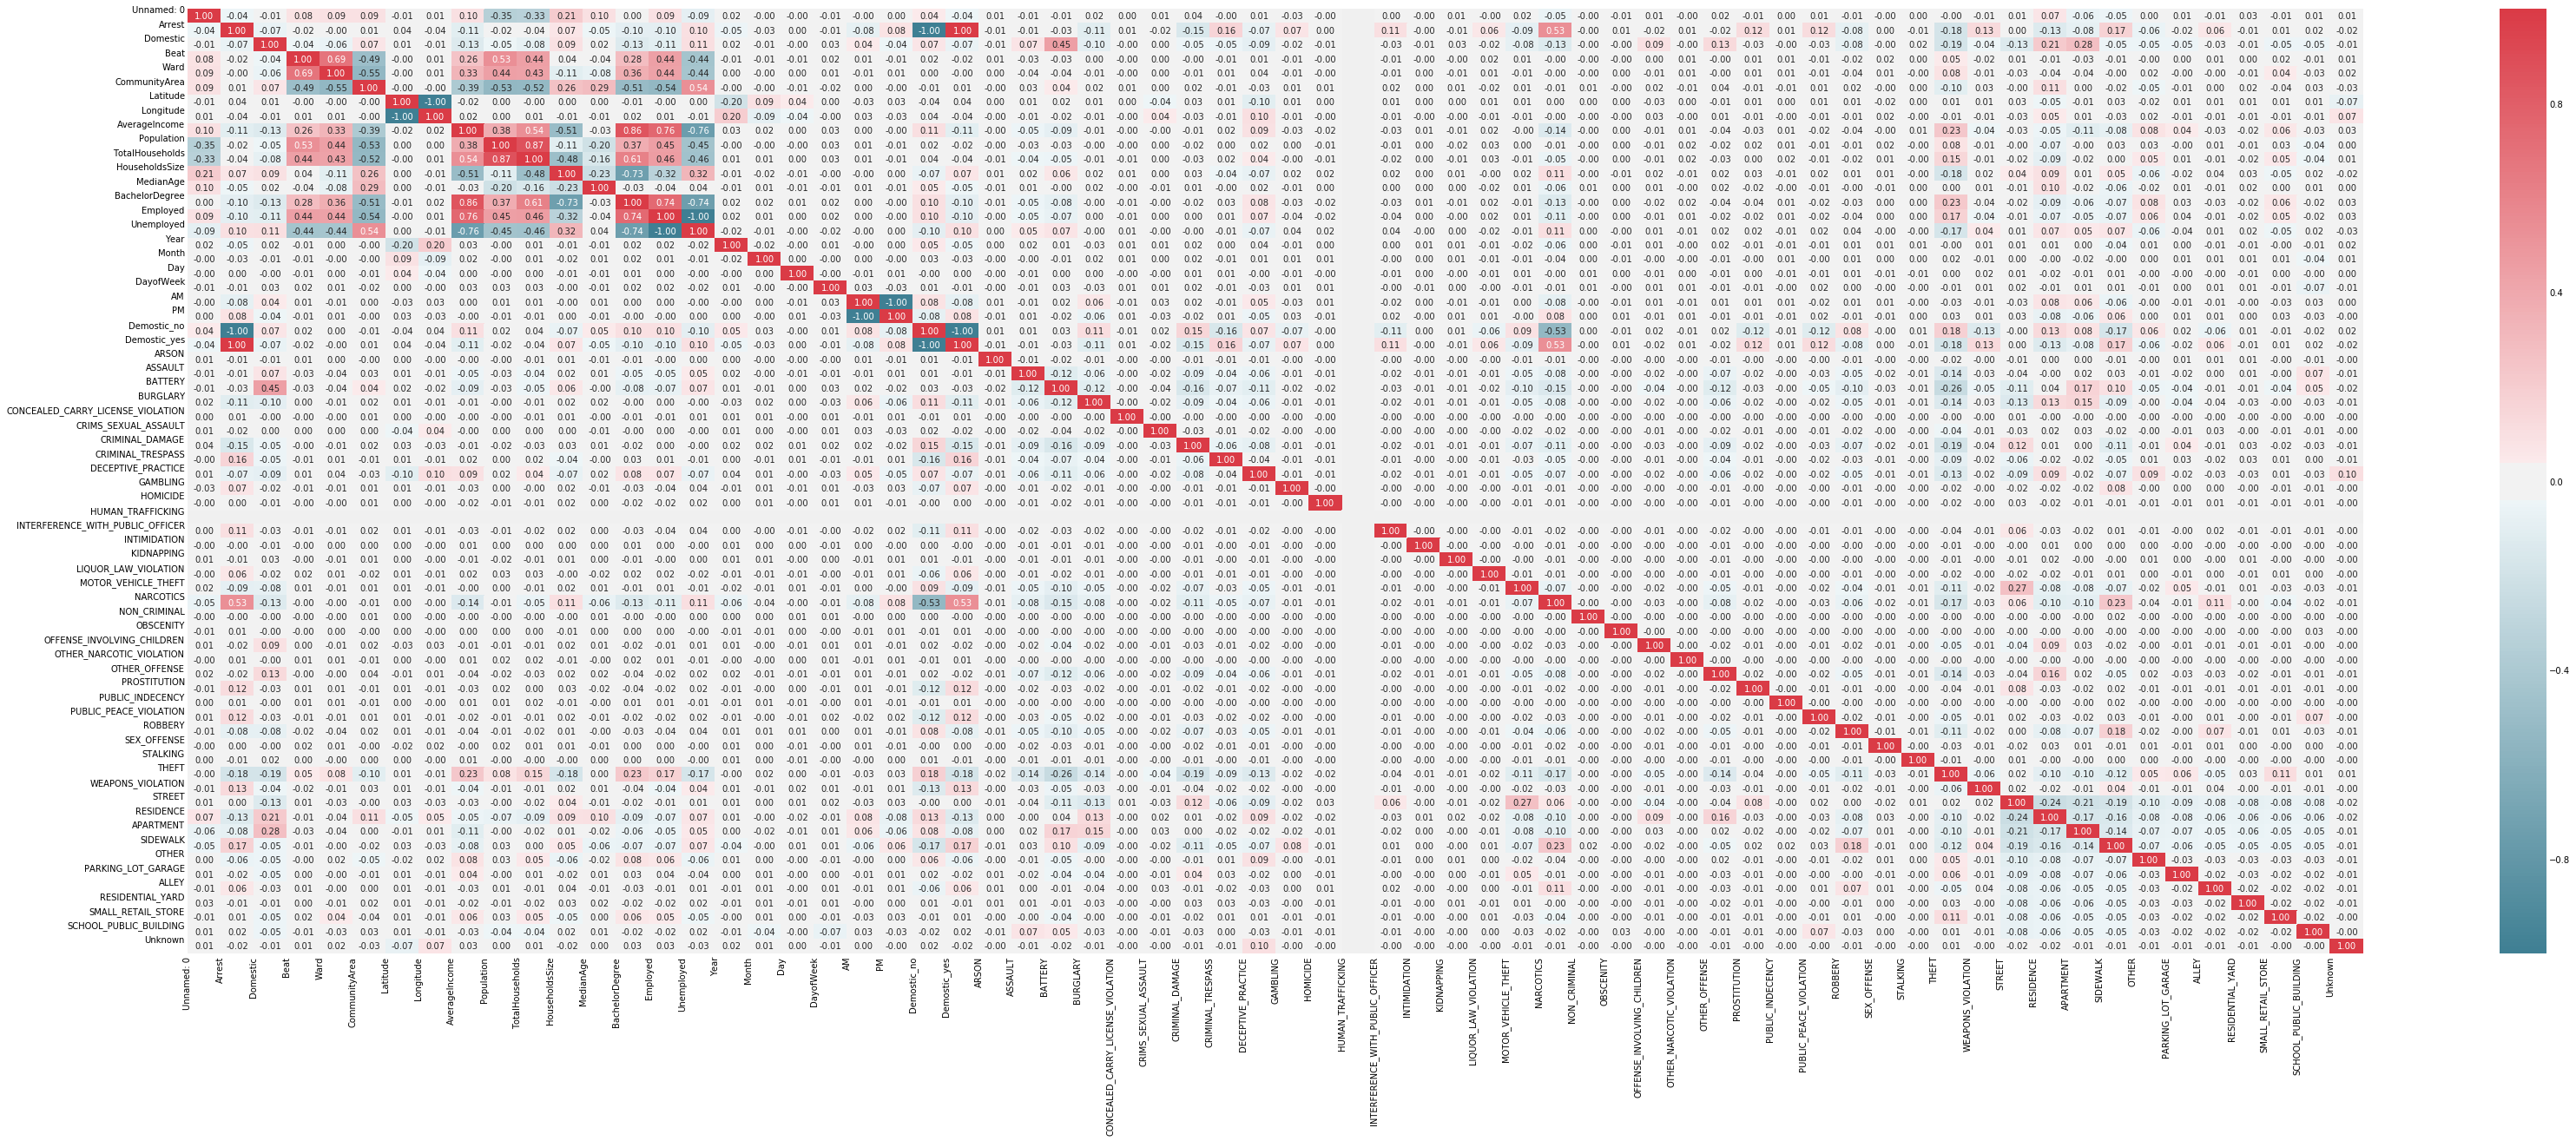

In [4]:
sample = crimes.sample(30000) ##sampling a part of the dataset
heatMap(sample)

### Feature selection

In [5]:
#features Selection...
model = DecisionTreeClassifier()
X= crimes[[ 'BATTERY', 'BURGLARY', 'WEAPONS_VIOLATION', 'HOMICIDE', 'ASSAULT',
       'PUBLIC_PEACE_VIOLATION', 'NARCOTICS', 'OTHER_OFFENSE', 'THEFT',
       'ROBBERY', 'CRIMINAL_DAMAGE', 'MOTOR_VEHICLE_THEFT', 'SEX_OFFENSE',
       'DECEPTIVE_PRACTICE', 'CRIMINAL_TRESPASS', 'CRIMS_SEXUAL_ASSAULT',
       'INTERFERENCE_WITH_PUBLIC_OFFICER', 'LIQUOR_LAW_VIOLATION',
       'OFFENSE_INVOLVING_CHILDREN', 'ARSON', 'PROSTITUTION', 'GAMBLING',
       'KIDNAPPING', 'INTIMIDATION', 'STALKING', 'OBSCENITY',
       'NON_CRIMINAL', 'CONCEALED_CARRY_LICENSE_VIOLATION',
       'HUMAN_TRAFFICKING', 'PUBLIC_INDECENCY',
       'OTHER_NARCOTIC_VIOLATION','AM','PM','TotalHouseholds' ,'Latitude' , 'Longitude'  , 'Year' , 'Month' , 'Day','Beat', 'AverageIncome', 'BachelorDegree','STREET','RESIDENCE','APARTMENT','Unknown','PARKING_LOT_GARAGE','SIDEWALK','OTHER','ALLEY','RESIDENTIAL_YARD','SMALL_RETAIL_STORE','SCHOOL_PUBLIC_BUILDING']]
Y = crimes['Arrest']
model.fit(X, Y)

### Build Random Forest Model

In [20]:
# Import RandomForestClassifier from scikit's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instanitate your Random Forest Classifier model object with n_estimators or
# the number of trees in the forest set to 20 (default is 10)
model = RandomForestClassifier(n_estimators = 20)

# Fit your model on the features (X) and the target (y)
model.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Extracting importance of features

In [32]:
# Set features variable with the names of the features in X
features = X.columns
print("Feature columns:", features)

# Set feature_importances variable using the attribute "feature_importances_".
# The higher the score, the more important the feature in that particular combination.
# If you changed the features in X it would impact the scores. Similar to coefficients.
feature_importances = model.feature_importances_
print("Feature Importance scores:", feature_importances)

# Create a dataframe of the features and their respective importance scores
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})

# Sort the values by "Importance Score" with ascending in false to ensure
# the score appear from highest to lowest in the new dataframe
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

Feature columns: Index(['BATTERY', 'BURGLARY', 'WEAPONS_VIOLATION', 'HOMICIDE', 'ASSAULT',
       'PUBLIC_PEACE_VIOLATION', 'NARCOTICS', 'OTHER_OFFENSE', 'THEFT',
       'ROBBERY', 'CRIMINAL_DAMAGE', 'MOTOR_VEHICLE_THEFT', 'SEX_OFFENSE',
       'DECEPTIVE_PRACTICE', 'CRIMINAL_TRESPASS', 'CRIMS_SEXUAL_ASSAULT',
       'INTERFERENCE_WITH_PUBLIC_OFFICER', 'LIQUOR_LAW_VIOLATION',
       'OFFENSE_INVOLVING_CHILDREN', 'ARSON', 'PROSTITUTION', 'GAMBLING',
       'KIDNAPPING', 'INTIMIDATION', 'STALKING', 'OBSCENITY', 'NON_CRIMINAL',
       'CONCEALED_CARRY_LICENSE_VIOLATION', 'HUMAN_TRAFFICKING',
       'PUBLIC_INDECENCY', 'OTHER_NARCOTIC_VIOLATION', 'AM', 'PM',
       'TotalHouseholds', 'Latitude', 'Longitude', 'Year', 'Month', 'Day',
       'Beat', 'AverageIncome', 'BachelorDegree', 'STREET', 'RESIDENCE',
       'APARTMENT', 'Unknown', 'PARKING_LOT_GARAGE', 'SIDEWALK', 'OTHER',
       'ALLEY', 'RESIDENTIAL_YARD', 'SMALL_RETAIL_STORE',
       'SCHOOL_PUBLIC_BUILDING'],
      dtype='object')
F

,Features,Importance Score
6,NARCOTICS,0.238485
34,Latitude,0.110356
35,Longitude,0.109692
38,Day,0.092594
37,Month,0.063868
39,Beat,0.052125
36,Year,0.035934
14,CRIMINAL_TRESPASS,0.029772
8,THEFT,0.019349
2,WEAPONS_VIOLATION,0.018779


### RE-selection the feature

In [36]:
#features Selection...
model = DecisionTreeClassifier()
X= crimes[[ 'BATTERY', 'BURGLARY', 'WEAPONS_VIOLATION', 'HOMICIDE', 'ASSAULT',
       'PUBLIC_PEACE_VIOLATION', 'NARCOTICS', 'OTHER_OFFENSE', 'THEFT',
       'ROBBERY', 'CRIMINAL_DAMAGE', 'MOTOR_VEHICLE_THEFT', 'SEX_OFFENSE',
       'DECEPTIVE_PRACTICE', 'CRIMINAL_TRESPASS', 'CRIMS_SEXUAL_ASSAULT',
       'INTERFERENCE_WITH_PUBLIC_OFFICER', 'LIQUOR_LAW_VIOLATION',
       'OFFENSE_INVOLVING_CHILDREN', 'ARSON', 'PROSTITUTION', 'GAMBLING',
       'KIDNAPPING', 'INTIMIDATION', 'STALKING', 'OBSCENITY',
        'AM','PM','TotalHouseholds' ,'Latitude' , 'Longitude'  , 'Year' , 'Month' , 'Day','Beat', 'AverageIncome', 'BachelorDegree','STREET','RESIDENCE','APARTMENT','PARKING_LOT_GARAGE','SIDEWALK','OTHER','ALLEY','RESIDENTIAL_YARD','SMALL_RETAIL_STORE','SCHOOL_PUBLIC_BUILDING']]
Y = crimes['Arrest']
model.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

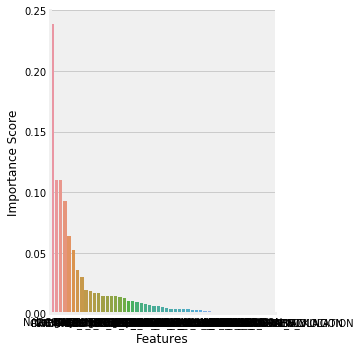

In [39]:

# Seaborn's factorplot draws a categorical plot onto a FacetGrid WITH COLORS!
sns.catplot(x='Features', y='Importance Score', kind='bar', data = features_df);


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
#target_names = ['class 0', 'class 1']

In [43]:
graph_model.fit(graph_X, graph_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
#target_names = ['class 0', 'class 1']

In [45]:
print("X_train shape:{}, y_train shape:{}\n".format(X_train.shape, y_train.shape))
print("X_test shape:{} y_test shape:{}".format(X_test.shape, y_test.shape))

X_train shape:(1092449, 47), y_train shape:(1092449,)

X_test shape:(364150, 47) y_test shape:(364150,)


In [46]:
print("What is the baseline or prevalance in my y_test?", (1 - y_test.mean())*100)

What is the baseline or prevalance in my y_test? 74.17410407798984


### Extracting importance of features

In [7]:

# Set features variable with the names of the features in X
features = X.columns
print("Feature columns:", features)

# Set feature_importances variable using the attribute "feature_importances_".
# The higher the score, the more important the feature in that particular combination.
# If you changed the features in X it would impact the scores. Similar to coefficients.
feature_importances = model.feature_importances_
print("Feature Importance scores:", feature_importances)

# Create a dataframe of the features and their respective importance scores
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})

# Sort the values by "Importance Score" with ascending in false to ensure
# the score appear from highest to lowest in the new dataframe
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

(200, 53)
(200,)


In [21]:
 Import RandomForestClassifier from scikit's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instanitate your Random Forest Classifier model object with n_estimators or
# the number of trees in the forest set to 20 (default is 10)
model = RandomForestClassifier(n_estimators = 20)

# Fit your model on the features (X) and the target (y)
model.fit(X, y)

SyntaxError: invalid syntax (<ipython-input-21-df62b8f7dcc5>, line 1)

In [ ]:
# Set features variable with the names of the features in X
features = X.columns
print("Feature columns:", features)

# Set feature_importances variable using the attribute "feature_importances_".
# The higher the score, the more important the feature in that particular combination.
# If you changed the features in X it would impact the scores. Similar to coefficients.
feature_importances = model.feature_importances_
print("Feature Importance scores:", feature_importances)

# Create a dataframe of the features and their respective importance scores
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})

# Sort the values by "Importance Score" with ascending in false to ensure
# the score appear from highest to lowest in the new dataframe
features_df.sort_values('Importance Score', inplace=True, ascending=False)



In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
#target_names = ['class 0', 'class 1']

In [23]:
print("X_train shape:{}, y_train shape:{}\n".format(X_train.shape, y_train.shape))
print("X_test shape:{} y_test shape:{}".format(X_test.shape, y_test.shape))

X_train shape:(1092449, 53), y_train shape:(1092449,)

X_test shape:(364150, 53) y_test shape:(364150,)


In [24]:
print("What is the baseline or prevalance in my y_test?", (1 - y_test.mean())*100)

What is the baseline or prevalance in my y_test? 74.17410407798984


NameError: name 'data' is not defined

In [25]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

#Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [26]:
pd.Series(y_test).value_counts(normalize=True).mul(100)

False    74.174104
True     25.825896
Name: Arrest, dtype: float64

In [27]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 81.35026774680763


In [28]:
cm = confusion_matrix(y_test, y_pred);
print(cm)

[[233922  36183]
 [ 31730  62315]]


In [29]:
TN = cm[0, 0]; 
TP = cm[1, 1]; 
FP = cm[0, 1]; 
FN = cm[1, 0]; 
print("True Positives:", TN/(TN+TP+FP+FN))
print("True Negatives:", TP/(TN+TP+FP+FN))
print("False Positives:", FP/(TN+TP+FP+FN))
print("False Negatives:", FN/(TN+TP+FP+FN))
print('--------------------------------------------------------------')
TP1=TN/(TN+TP+FP+FN)
TN1= TP/(TN+TP+FP+FN)
FP1= FP/(TN+TP+FP+FN)
FN1 =FN/(TN+TP+FP+FN)
print('Total True=', TP1+TN1)
print('Total False=', FP1+FN1)
misclassification = (FP + FN) / float(TP + TN + FP + FN)

True Positives: 0.6423781408760126
True Negatives: 0.1711245365920637
False Positives: 0.09936289990388576
False Negatives: 0.0871344226280379
--------------------------------------------------------------
Total True= 0.8135026774680764
Total False= 0.18649732253192366


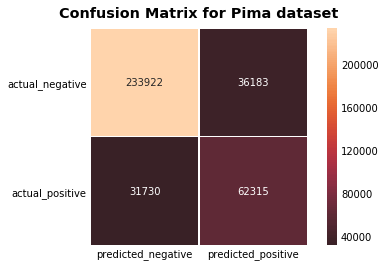

In [30]:
# converting the y_test, y_pred into an array assigned to variable "cm" 
# (short for confusion matrix)
cm = np.array(confusion_matrix(y_test, y_pred))
cm_lr = pd.DataFrame(cm, index=['actual_negative', 'actual_positive'],
                             columns=['predicted_negative',
                                      'predicted_positive']); cm_lr
#Center: The value at which to center the colormap when plotting divergant data.
plt.title('Confusion Matrix for Pima dataset', fontweight='bold', y=1.02)
sns.heatmap(pd.DataFrame(cm_lr), annot=True, square=True, linewidth=0.5, fmt='', center=0)
plt.yticks(rotation=0);

In [31]:
# Here the classification_report from scikit's metrics library displays
# the precision, recall, f1-score, and support (number of instances) for each class.


# Precision = when it predicts yes, how often is it correct?
# Recall or Sensitivity = when it's actually yes, how often does it predict yes?

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.87      0.87    270105
        True       0.63      0.66      0.65     94045

   micro avg       0.81      0.81      0.81    364150
   macro avg       0.76      0.76      0.76    364150
weighted avg       0.82      0.81      0.81    364150

